In [1]:
Pkg.add("ScikitLearn")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of ScikitLearn
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [2]:
using DataFrames, PyPlot, ScikitLearn, Gadfly

    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /home/juser/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.DataArray, AbstractArray) at /home/juser/.julia/v0.4/DataArrays/src/operators.jl:276.
To fix, define 
    +(DataArrays.DataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.
    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /home/juser/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.AbstractDataArray, AbstractArray) at /home/juser/.julia/v0.4/DataArrays/src/operators.jl:300.
To fix, define 
    +(DataArrays.AbstractDataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.


In [5]:
Pkg.rm("LowRankModels");

INFO: Removing LowRankModels (unregistered)


In [6]:
Pkg.clone("http://github.com/madeleineudell/LowRankModels.jl");
using LowRankModels
include("proxgrad.jl")

INFO: Cloning LowRankModels from http://github.com/madeleineudell/LowRankModels.jl
INFO: Computing changes...
INFO: No packages to install, update or remove
INFO: Package database updated
INFO: Precompiling module LowRankModels.


proxgrad_const (generic function with 1 method)

In [7]:
Y=readtable("finalresult.csv")[:,2:3];

In [8]:
example_trump=readtable("selectedArea_trump.csv");
example_clinton=readtable("selectedArea_clinton.csv");
labels=["Broward","Gadsden","Holmes","Lafayatte"];

 in depwarn at deprecated.jl:73
 in int at deprecated.jl:50
 [inlined code] from In[9]:5
 in anonymous at no file:0
 in include_string at loading.jl:295
 in execute_request at /opt/julia_packages/.julia/v0.4/IJulia/src/execute_request.jl:169
 in eventloop at /opt/julia_packages/.julia/v0.4/IJulia/src/eventloop.jl:8
 in anonymous at task.jl:447
while loading In[9], in expression starting on line 2


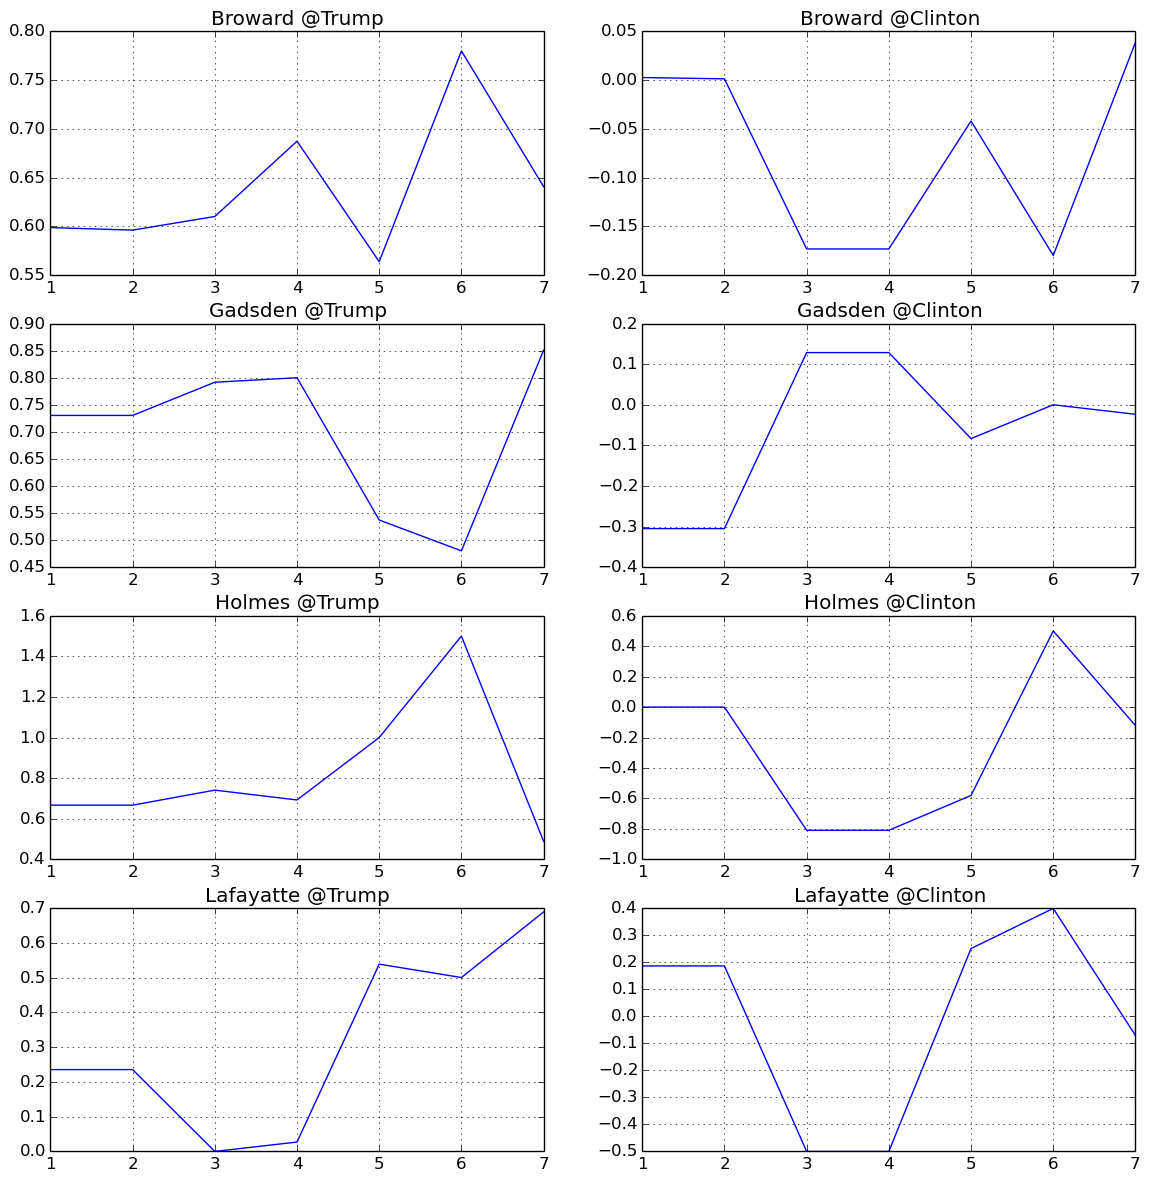

 in depwarn at deprecated.jl:73
 in int at deprecated.jl:50
 [inlined code] from In[9]:7
 in anonymous at no file:0
 in include_string at loading.jl:295
 in execute_request at /opt/julia_packages/.julia/v0.4/IJulia/src/execute_request.jl:169
 in eventloop at /opt/julia_packages/.julia/v0.4/IJulia/src/eventloop.jl:8
 in anonymous at task.jl:447
while loading In[9], in expression starting on line 2
 in depwarn at deprecated.jl:73
 in int at deprecated.jl:50
 [inlined code] from In[9]:10
 in anonymous at no file:0
 in include_string at loading.jl:295
 in execute_request at /opt/julia_packages/.julia/v0.4/IJulia/src/execute_request.jl:169
 in eventloop at /opt/julia_packages/.julia/v0.4/IJulia/src/eventloop.jl:8
 in anonymous at task.jl:447
while loading In[9], in expression starting on line 2
 in depwarn at deprecated.jl:73
 in int at deprecated.jl:50
 [inlined code] from In[9]:12
 in anonymous at no file:0
 in include_string at loading.jl:295
 in execute_request at /opt/julia_packages/.j

In [9]:
fig=figure("areasubplot",figsize=(14,14))
for i in 1:8
    if i%2==1
        subplot(4,2,i) # Create the 1st axis of a 2x2 arrax of axes
        PyPlot.plot(1:7,example_trump[:,int((i+1)/2+1)])
        grid("on") # Create a grid on the axis
        title(string(labels[int((i+1)/2)]," ","@Trump")) # Give the most recent axis a title
    else    
        subplot(4,2,i) # Create the 1st axis of a 2x2 arrax of axes
        PyPlot.plot(1:7,example_clinton[:,int((i)/2+1)])
        grid("on") # Create a grid on the axis
        title(string(labels[int((i)/2)]," ","@Clinton")) # Give the most recent axis a title

    end  



end


In [10]:
standard_trump=readtable("average_Trump.csv");
standard_clinton=readtable("average_Clinton.csv");
y=standard_trump[2];
stdev=standard_trump[3];

 in depwarn at deprecated.jl:73
 in color at /home/juser/.julia/v0.4/Colors/src/parse.jl:152
 in include_string at loading.jl:295
 in execute_request at /opt/julia_packages/.julia/v0.4/IJulia/src/execute_request.jl:169
 in eventloop at /opt/julia_packages/.julia/v0.4/IJulia/src/eventloop.jl:8
 in anonymous at task.jl:447
while loading In[11], in expression starting on line 2


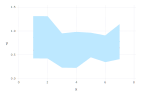

In [11]:
# Broward
p =Gadfly.plot(layer(standard_trump, x=1:7, y=y, ymin=y-stdev, ymax=y+stdev, Geom.line, Geom.ribbon),
layer(example_trump,x=1:7,y=example_trump[2],Geom.line,Theme(default_color=color("red"))))

 in depwarn at deprecated.jl:73
 in color at /home/juser/.julia/v0.4/Colors/src/parse.jl:152
 in include_string at loading.jl:295
 in execute_request at /opt/julia_packages/.julia/v0.4/IJulia/src/execute_request.jl:169
 in eventloop at /opt/julia_packages/.julia/v0.4/IJulia/src/eventloop.jl:8
 in anonymous at task.jl:447
while loading In[12], in expression starting on line 2


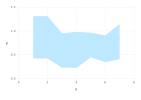

In [12]:
#Gadsden
p =Gadfly.plot(layer(standard_trump, x=1:7, y=y, ymin=y-stdev, ymax=y+stdev, Geom.line, Geom.ribbon),
layer(example_trump,x=1:7,y=example_trump[3],Geom.line,Theme(default_color=color("red"))))

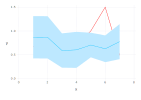

In [13]:
#Holmes
p =Gadfly.plot(layer(standard_trump, x=1:7, y=y, ymin=y-stdev, ymax=y+stdev, Geom.line, Geom.ribbon),
layer(example_trump,x=1:7,y=example_trump[4],Geom.line,Theme(default_color=color("red"))))

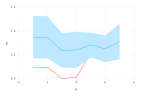

In [14]:
#Lafayatte
p =Gadfly.plot(layer(standard_trump, x=1:7, y=y, ymin=y-stdev, ymax=y+stdev, Geom.line, Geom.ribbon),
layer(example_trump,x=1:7,y=example_trump[5],Geom.line,Theme(default_color=color("red"))))

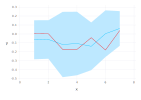

In [15]:
#Clinton's case
y=standard_clinton[2];
stdev=standard_clinton[3];
p =Gadfly.plot(layer(standard_clinton, x=1:7, y=y, ymin=y-stdev, ymax=y+stdev, Geom.line, Geom.ribbon),
layer(example_clinton,x=1:7,y=example_clinton[2],Geom.line,Theme(default_color=color("red"))))

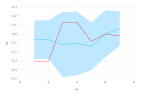

In [16]:
p =Gadfly.plot(layer(standard_clinton, x=1:7, y=y, ymin=y-stdev, ymax=y+stdev, Geom.line, Geom.ribbon),
layer(example_clinton,x=1:7,y=example_clinton[3],Geom.line,Theme(default_color=color("red"))))

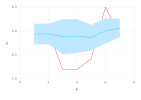

In [17]:
p =Gadfly.plot(layer(standard_clinton, x=1:7, y=y, ymin=y-stdev, ymax=y+stdev, Geom.line, Geom.ribbon),
layer(example_clinton,x=1:7,y=example_clinton[4],Geom.line,Theme(default_color=color("red"))))

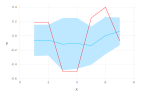

In [18]:
p =Gadfly.plot(layer(standard_clinton, x=1:7, y=y, ymin=y-stdev, ymax=y+stdev, Geom.line, Geom.ribbon),
layer(example_clinton,x=1:7,y=example_clinton[5],Geom.line,Theme(default_color=color("red"))))

In [19]:
#Try to use the last day before election to predict the election result
#Get the data
Y_trump=Y[2]
Y_clinton=Y[1]
X_trump=readtable("data 3  Trump.csv");
X_clinton=readtable("data 3  Clinton.csv");

X_trump=hcat(X_trump,Y_trump);
X_clinton=hcat(X_clinton,Y_clinton);

X_trump=X_trump[!isna(X_trump[:score]),:];
X_clinton=X_clinton[!isna(X_clinton[:score]),:];

Y_clinton=X_clinton[:,end];
X_clinton=hcat(Array(X_clinton[:,2:end-1]),ones(size(X_clinton,1)));
Y_trump=X_trump[:,end];
X_trump=hcat(Array(X_trump[:,2:end-1]),ones(size(X_trump,1)));


In [20]:
#Least square method
function lstsqr(x,y)
    par_num=size(x,2)
    Q,R=qr(x)
    w=R\(Q'*y)
    return w
end

lstsqr (generic function with 1 method)

In [21]:
lstsqr(Array(X_trump),Array(Y_trump))

7-element Array{Float64,1}:
 -0.000305459
 -0.000213714
 -0.0208634  
  0.000432278
 -0.123539   
 -0.0181916  
  0.764292   

In [22]:
#Proximal gradient descent, assuming a low rank model

In [23]:
X_trump=convert(Array{Float64,2}, X_trump)
proxgrad(QuadLoss(), ZeroReg(), X_trump, Array(Y_trump), maxiters=1000,stepsize=0.0001)

7-element Array{Float64,1}:
 -0.00206709 
 -0.000796602
  0.00192286 
  0.0042791  
  0.00235319 
  0.00151289 
  0.00297948 

In [24]:
#Try out a principle component analysis
#First, normalize the data
for i in 1:size(X_clinton,2)
    Mean=mean(X_clinton[:,i])
    stdev=std(X_clinton[:,i]) 
    X_clinton[:,i]=(X_clinton[:,i]-Mean)/stdev
end 
for i in 1:size(X_trump,2)
    Mean=mean(X_trump[:,i])
    stdev=std(X_trump[:,i]) 
    X_trump[:,i]=(X_trump[:,i]-Mean)/stdev
end 

In [25]:
f(x)= x>=0.5
g(x)= x<0.5
wt=find(f,Y_trump);
lt=find(g,Y_trump)
wc=find(f,Y_clinton);
lc=find(g,Y_clinton);


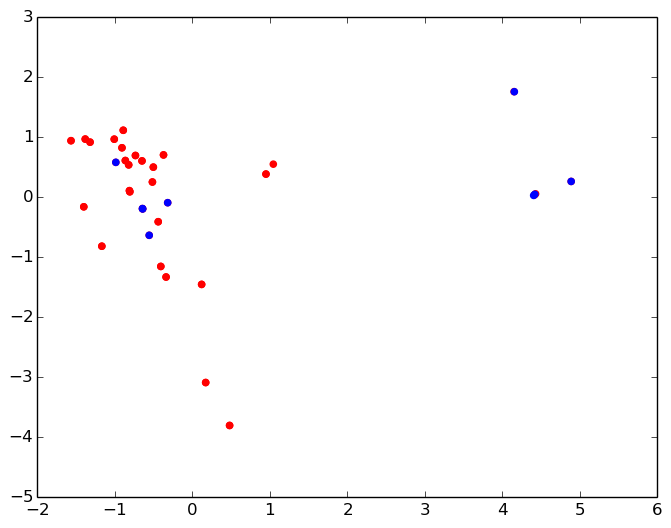

PyObject <matplotlib.collections.PathCollection object at 0x7fde8c6c3690>

In [26]:
U,σ,V = svd(X_clinton[:,1:end-1]);
#Try the first two component
components=U*diagm(σ)[:,1:2]
PyPlot.scatter(components[lc,1],components[lc,2],color="Red")
PyPlot.scatter(components[wc,1],components[wc,2],color="Blue")


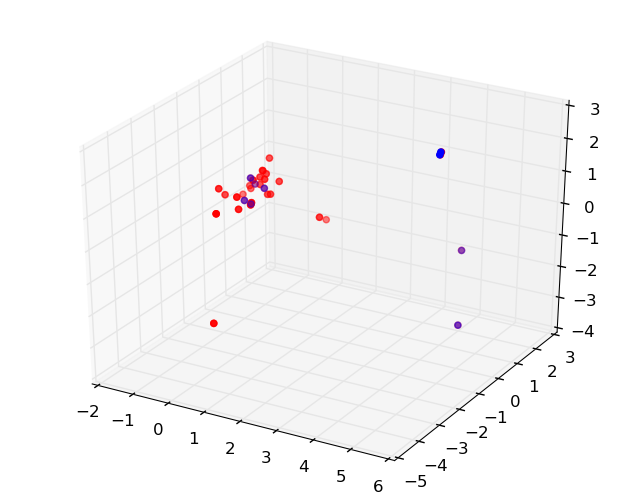

PyObject <mpl_toolkits.mplot3d.art3d.Patch3DCollection object at 0x7fde8c672250>

In [27]:
components=U*diagm(σ)[:,1:3]
PyPlot.scatter3D(components[lc,1],components[lc,2],components[lc,3],color="Red")
PyPlot.scatter3D(components[wc,1],components[wc,2],components[wc,3],color="Blue")

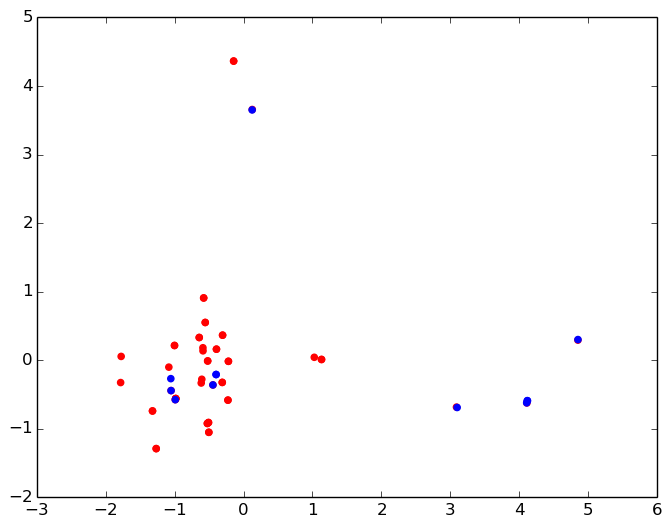

PyObject <matplotlib.collections.PathCollection object at 0x7fde8c55eb10>

In [28]:
U,σ,V = svd(X_trump[:,1:end-1]);
#Try the first two component
components=U*diagm(σ)[:,1:2]
PyPlot.scatter(components[wt,1],components[wt,2],color="Red")
PyPlot.scatter(components[lt,1],components[lt,2],color="Blue")

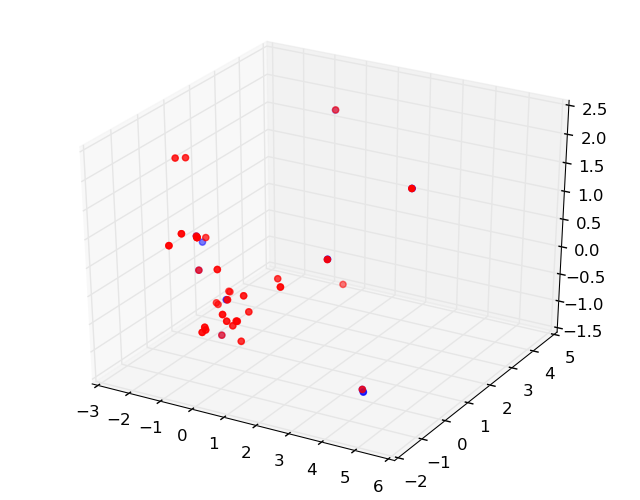

PyObject <mpl_toolkits.mplot3d.art3d.Patch3DCollection object at 0x7fde8c488790>

In [29]:
components=U*diagm(σ)[:,1:3]
PyPlot.scatter3D(components[wt,1],components[wt,2],components[wt,3],color="Red")
PyPlot.scatter3D(components[lt,1],components[lt,2],components[lt,3],color="Blue")

In [30]:
#Try to use the last day before election to predict the election result
#Get the data
Y_trump=Y[2]
Y_clinton=Y[1]
Y_binary=ones(length(Y_trump))
for i in 1:length(Y_trump)
    if Y_trump[i]>=0.5
        Y_binary[i]=1
    else
        Y_binary[i]=-1
    end 
end

In [31]:
function CleanData(i,name,Y_binary)
    X=readtable(string("data ",i,"  ",name,".csv"));
    X=hcat(X,Y_binary);
    X=X[!isna(X[:score]),:];
    Y=X[:,end];
    X=hcat(Array(X[:,2:end-1]),ones(size(X,1)));
    return X,Y
end 

CleanData (generic function with 1 method)

In [32]:
#Use a perceptron algorithm to calculate a error rate
function perceptron(X,y;
                    maxsteps=1000, # 
                    w = rand(size(X,2))) # initial guess for w
    
    ##While there is a misclassified example, update w##
    a=0
    t=0
    while (a!=size(X,1) )& (t<=1000)
        a=0
        for i in 1:size(X,1)
            a=a+(sign(dot(vec(X[i,:]),w))==y[i])
            if sign(dot(vec(X[i,:]),w))!=y[i]
                w=w+y[i]*vec(X[i,:])
                t=t+1
            end 
        end
    end
    prediction=X*w
    return w,t,prediction
end

perceptron (generic function with 1 method)

In [33]:
stderror=zeros(7)
HingeError=zeros(7)
LogisticError=zeros(7)
QuadError=zeros(7)
PCA2_Error=zeros(7)# Both use logistic
PCA3_Error=zeros(7)
PerceptronError=zeros(7)
for i in 1:7
    X,Y=CleanData(i,"Trump",Y_binary)
    X=convert(Array{Float64,2}, X)
    U,σ,V = svd(X[:,1:end-1]);
    
    #Try the first two component
    components=U*diagm(σ);
    
    stderror[i]=(size(X,1)-sum(Y))/(2*size(X,1))
    
    #Perceptron
    PerceptronError[i]=sum(sign(perceptron(X,Y)[3])-Y)/(2*size(X,1))
    
    w_logistic = proxgrad(1/length(Y)*LogisticLoss(), ZeroReg(), X, int(Y), stepsize=1, maxiters=1000)
    LogisticError[i]=sum(sign(X*w_logistic)-Y)/(2*size(X,1))
    #
    w_Hinge = proxgrad(1/length(Y)*HingeLoss(), ZeroReg(),X, int(Y), stepsize=1, maxiters=1000)
    HingeError[i]=sum(sign(X*w_Hinge)-Y)/(2*size(X,1)) 
    #Quad 
    w_Quad = proxgrad(1/length(Y)*QuadLoss(), ZeroReg(),X, int(Y), stepsize=1, maxiters=1000)
    QuadError[i]=sum(sign(X*w_Quad)-Y)/(2*size(X,1)) 
    
    #PCA_2
    w_logistic2 = proxgrad(1/length(Y)*LogisticLoss(), ZeroReg(), components[:,1:2], int(Y), stepsize=1, maxiters=1000)
    PCA2_Error[i]=sum(sign(components[:,1:2]*w_logistic2)-Y)/(2*size(X,1))
    #PCA_3
    w_logistic3 = proxgrad(1/length(Y)*LogisticLoss(), ZeroReg(), components[:,1:3], int(Y), stepsize=1, maxiters=1000)
    PCA3_Error[i]=sum(sign(components[:,1:3]*w_logistic3)-Y)/(2*size(X,1))

end

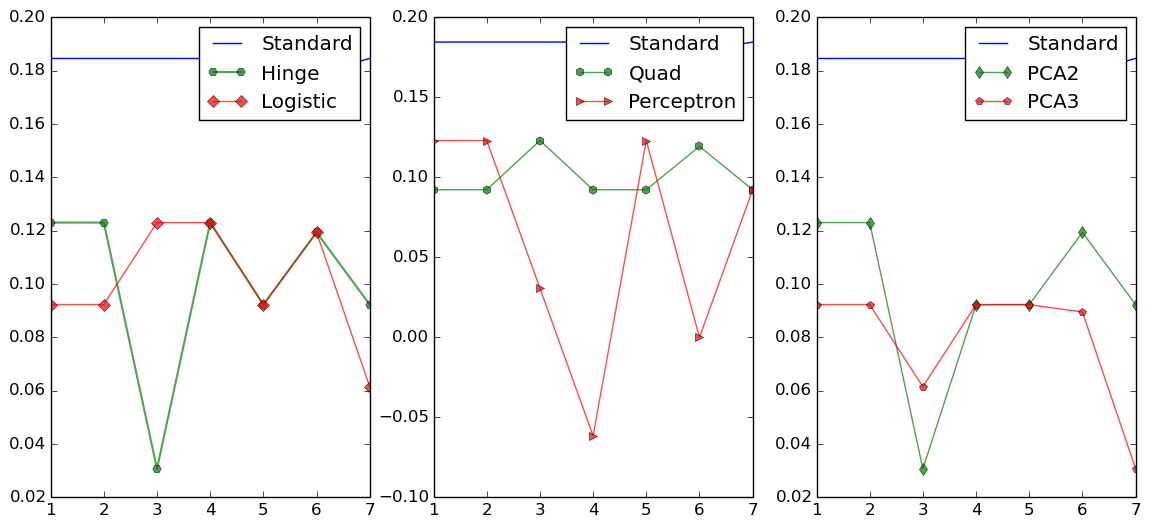

PyObject <matplotlib.legend.Legend object at 0x7fde89a61ed0>

In [34]:
fig=figure("errors",figsize=(14,6))
subplot(1,3,1)
PyPlot.plot(1:7,stderror)
PyPlot.plot(1:7,HingeError,lw=1.5,marker="H",alpha=0.7)
PyPlot.plot(1:7,LogisticError,marker="D",alpha=0.7)
PyPlot.legend(["Standard", "Hinge", "Logistic"])
subplot(1,3,2)
PyPlot.plot(1:7,stderror)
PyPlot.plot(1:7,QuadError,marker="h",alpha=0.7)
PyPlot.plot(1:7,PerceptronError,marker=">",alpha=0.7)
PyPlot.legend(["Standard", "Quad","Perceptron"])
subplot(1,3,3)
PyPlot.plot(1:7,stderror)
PyPlot.plot(1:7,PCA2_Error,marker="d",alpha=0.7)
PyPlot.plot(1:7,PCA3_Error,marker="p",alpha=0.7)
PyPlot.legend(["Standard","PCA2","PCA3"])

In [35]:
stderror=zeros(7)
HingeError=zeros(7)
LogisticError=zeros(7)
QuadError=zeros(7)
PCA2_Error=zeros(7)# Both use logistic
PCA3_Error=zeros(7)
PerceptronError=zeros(7)
for i in 1:7
    X,Y=CleanData(i,"Clinton",Y_binary)
    X=convert(Array{Float64,2}, X)
    U,σ,V = svd(X[:,1:end-1]);
    
    #Try the first two component
    components=U*diagm(σ);
    
    stderror[i]=(size(X,1)-sum(Y))/(2*size(X,1))
    
    #Perceptron
    PerceptronError[i]=sum(sign(perceptron(X,Y)[3])-Y)/(2*size(X,1))
    
    w_logistic = proxgrad(1/length(Y)*LogisticLoss(), ZeroReg(), X, int(Y), stepsize=1, maxiters=1000)
    LogisticError[i]=sum(sign(X*w_logistic)-Y)/(2*size(X,1))
    #
    w_Hinge = proxgrad(1/length(Y)*HingeLoss(), ZeroReg(),X, int(Y), stepsize=1, maxiters=1000)
    HingeError[i]=sum(sign(X*w_Hinge)-Y)/(2*size(X,1)) 
    #Quad 
    w_Quad = proxgrad(1/length(Y)*QuadLoss(), ZeroReg(),X, int(Y), stepsize=1, maxiters=1000)
    QuadError[i]=sum(sign(X*w_Quad)-Y)/(2*size(X,1)) 
    
    #PCA_2
    w_logistic2 = proxgrad(1/length(Y)*LogisticLoss(), ZeroReg(), components[:,1:2], int(Y), stepsize=1, maxiters=1000)
    PCA2_Error[i]=sum(sign(components[:,1:2]*w_logistic2)-Y)/(2*size(X,1))
    #PCA_3
    w_logistic3 = proxgrad(1/length(Y)*LogisticLoss(), ZeroReg(), components[:,1:3], int(Y), stepsize=1, maxiters=1000)
    PCA3_Error[i]=sum(sign(components[:,1:3]*w_logistic3)-Y)/(2*size(X,1))

end

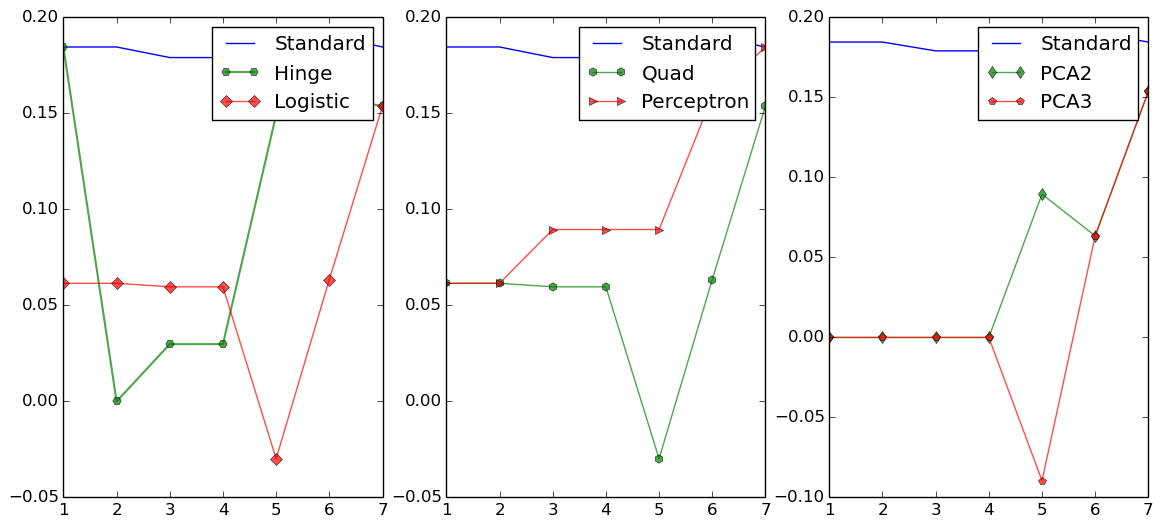

PyObject <matplotlib.legend.Legend object at 0x7fde897e03d0>

In [36]:
fig=figure("errors",figsize=(14,6))
subplot(1,3,1)
PyPlot.plot(1:7,stderror)
PyPlot.plot(1:7,HingeError,lw=1.5,marker="H",alpha=0.7)
PyPlot.plot(1:7,LogisticError,marker="D",alpha=0.7)
PyPlot.legend(["Standard", "Hinge", "Logistic"])
subplot(1,3,2)
PyPlot.plot(1:7,stderror)
PyPlot.plot(1:7,QuadError,marker="h",alpha=0.7)
PyPlot.plot(1:7,PerceptronError,marker=">",alpha=0.7)
PyPlot.legend(["Standard", "Quad","Perceptron"])
subplot(1,3,3)
PyPlot.plot(1:7,stderror)
PyPlot.plot(1:7,PCA2_Error,marker="d",alpha=0.7)
PyPlot.plot(1:7,PCA3_Error,marker="p",alpha=0.7)
PyPlot.legend(["Standard","PCA2","PCA3"])